In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy as sp

import jax.numpy as jnp
from jax import random, jit, vmap
import jax.scipy as jsp

[]

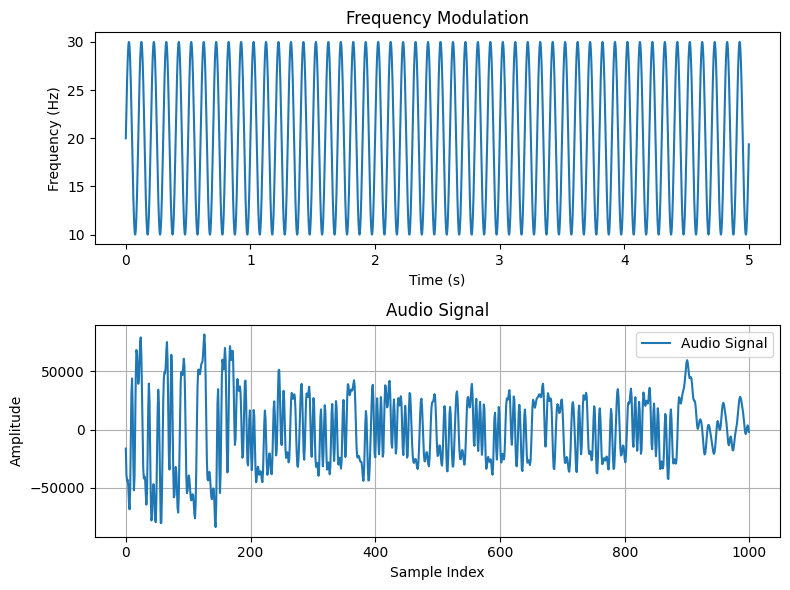

In [33]:
srate = 1000
dt = 1/srate  # in ms
t = jnp.arange(0, 5, dt)
f = 20 + 10*np.sin(2*np.pi*10*t)

#plt.plot(t, f)


sr,audio = sp.io.wavfile.read('/home/rafael19/Math_code/jadna.wav')

#plt.plot(audio[:1000])

fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].plot(t, f, label='Frequency Modulation')
ax[0].set_title('Frequency Modulation')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Frequency (Hz)')
ax[1].plot(audio[:1000], label='Audio Signal')
ax[1].set_title('Audio Signal')
ax[1].set_xlabel('Sample Index')
ax[1].set_ylabel('Amplitude')
ax[1].legend()
plt.tight_layout()
plt.grid(True) 

plt.plot()

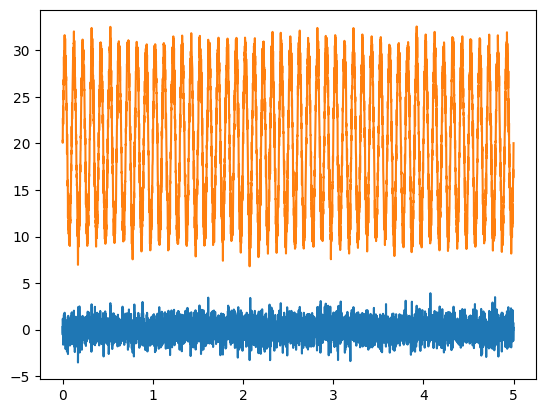

In [34]:
ruido = np.random.normal(0, 1, len(t))
plt.plot(t, ruido)

X = f + ruido
plt.plot(t, X)

[]

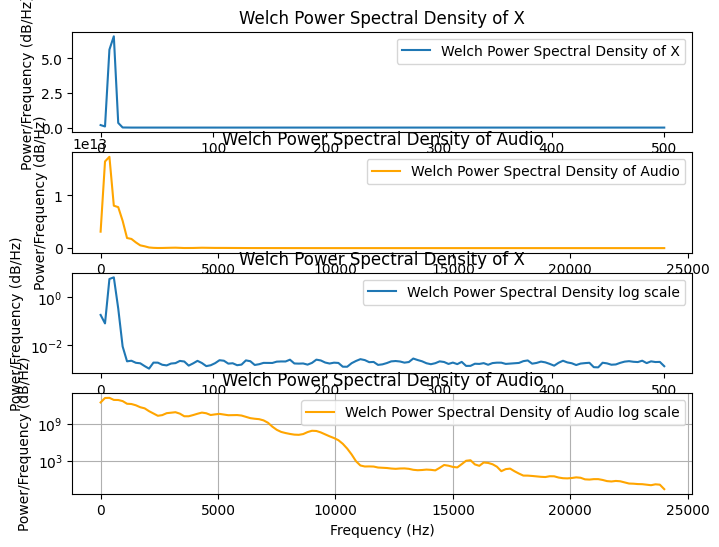

In [39]:
F, Pxx = sp.signal.welch(X, fs=srate, nperseg=256)

F1 , Pxx1 = jsp.signal.welch(audio, fs=sr, nperseg=256)

#plt.plot(F, Pxx)
#plt.xlim(0, 100)

fig,ax = plt.subplots(4, 1, figsize=(8, 6))
#ax[0].semilogy(F, Pxx, label='Welch Power Spectral Density')
ax[0].plot(F , Pxx, label='Welch Power Spectral Density of X')
ax[0].set_title('Welch Power Spectral Density of X')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('Power/Frequency (dB/Hz)')
#ax[1].semilogy(F1, Pxx1, label='Welch Power Spectral Density of Audio', color='orange')
ax[1].plot(F1, Pxx1, label='Welch Power Spectral Density of Audio', color='orange')
ax[1].set_title('Welch Power Spectral Density of Audio')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Power/Frequency (dB/Hz)')
ax[0].legend()
ax[1].legend()


ax[2].semilogy(F, Pxx, label='Welch Power Spectral Density log scale')
#ax[2].plot(F , Pxx, label='Welch Power Spectral Density of X')
ax[2].set_title('Welch Power Spectral Density of X')
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('Power/Frequency (dB/Hz)')
ax[3].semilogy(F1, Pxx1, label='Welch Power Spectral Density of Audio log scale', color='orange')
#ax[1].plot(F1, Pxx1, label='Welch Power Spectral Density of Audio', color='orange')
ax[3].set_title('Welch Power Spectral Density of Audio')
ax[3].set_xlabel('Frequency (Hz)')
ax[3].set_ylabel('Power/Frequency (dB/Hz)')
ax[2].legend()
ax[3].legend()




plt.grid(True)


plt.plot()

### Filtros 

[]

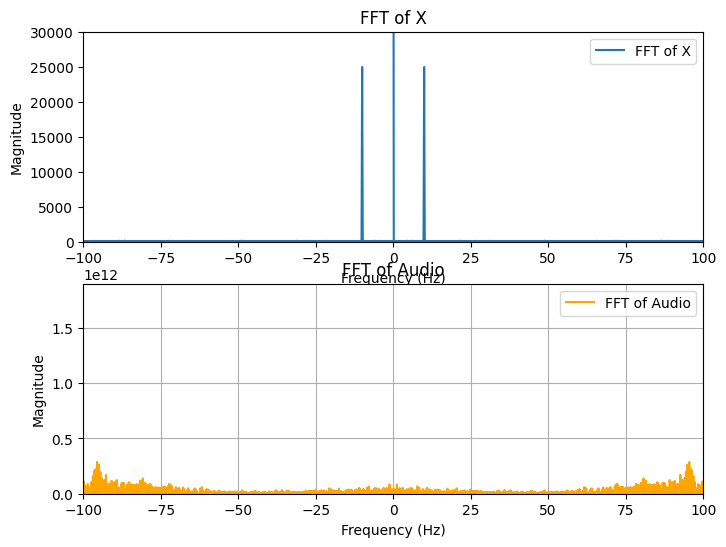

In [64]:
### Applying the fft to see the frequency components 



# Reconstruct LFP signal

lfp_fft = jnp.fft.fft(X)
lfp_f = jnp.fft.fftfreq(len(X), d=dt)

audio_fft = jnp.fft.fft(audio)
audio_f = jnp.fft.fftfreq(len(audio), d=1/sr)

fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].plot(lfp_f, jnp.abs(lfp_fft), label='FFT of X')
ax[0].set_title('FFT of X')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('Magnitude')
ax[1].plot(audio_f, audio_fft, label='FFT of Audio', color='orange')
ax[1].set_title('FFT of Audio')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Magnitude')
ax[0].legend()
ax[1].legend()
ax[0].set_xlim(-100, 100)
ax[1].set_xlim(-100, 100)
ax[0].set_ylim(0, 30000)
ax[1].set_ylim(0, )
plt.grid(True)

plt.plot()

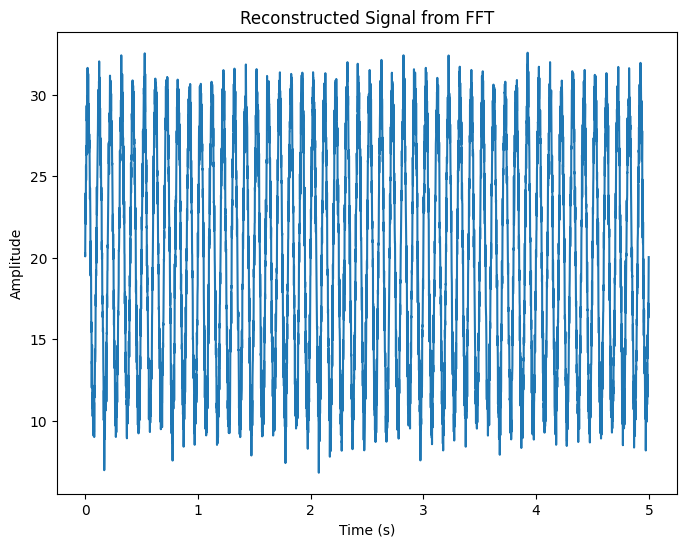

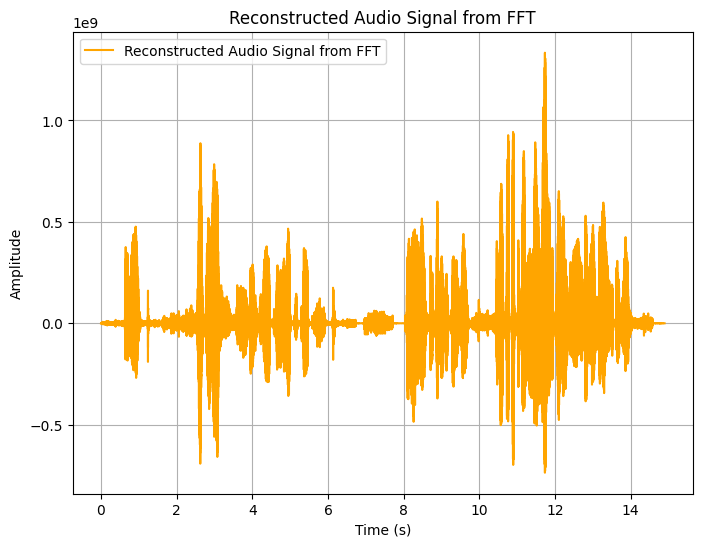

In [61]:
#plt.plot(audio_fft)
#plt.plot(lfp_fft)

reconstructed_signal = jnp.fft.ifft(lfp_fft)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(t, reconstructed_signal.real, label='Reconstructed Signal from FFT')
ax.set_title('Reconstructed Signal from FFT')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')  


recons_audio_signal = jnp.fft.ifft(audio_fft)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(jnp.arange(len(recons_audio_signal)) / sr, recons_audio_signal.real, label='Reconstructed Audio Signal from FFT', color='orange')
ax.set_title('Reconstructed Audio Signal from FFT')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.legend()
plt.grid(True)
plt.show()


audio2 = sp.io.wavfile.write

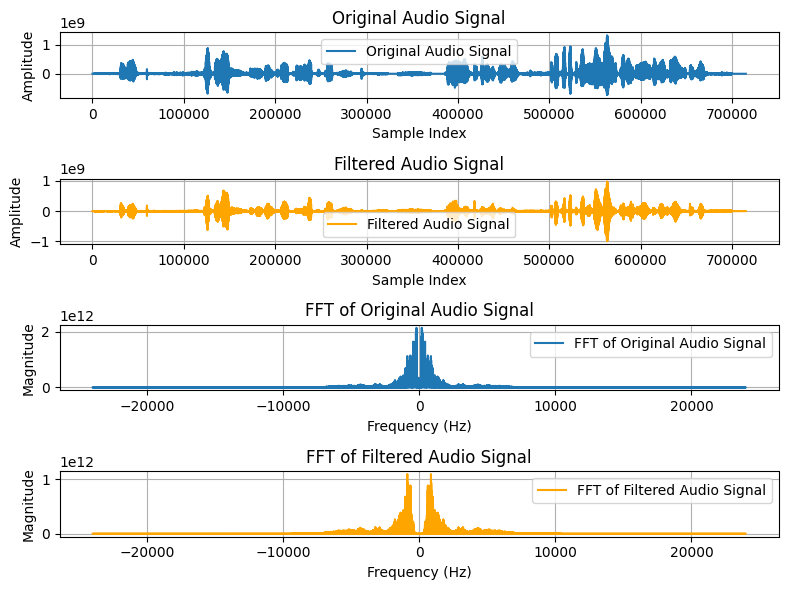

In [87]:
audio_np = np.array(audio) # If 'audio' was your JAX array
# sr = your_sampling_rate

# --- Filter Design ---
cutoff_frequency = 550.0  # Hz
filter_order = 4         # Filter order (e.g., 4th order Butterworth)

# Design a Butterworth high-pass filter
# b and a are the filter coefficients (numerator and denominator)
b, a = sp.signal.butter(filter_order, cutoff_frequency, btype='highpass', fs=sr, analog=False)

# --- Apply the Filter ---
# Use filtfilt for zero-phase filtering (avoids phase distortion)
# This is generally preferred for audio processing.
filtered_audio_np = sp.signal.filtfilt(b, a, audio_np)

# Now, 'filtered_audio_np' contains the audio with frequencies below the cut_off_freqs Hz attenuated.

# --- Optional: Visualize the filter's frequency response ---
w, h = sp.signal.freqz(b, a, fs=sr, worN=8000) 

# it gonna has 4 plots, plot 1 is the original audio, plot 2 is the filtered audio, plot 3 is the fft of the original audio, plot 4 is the fft of the filtered audio


audio_fft = jnp.fft.fft(audio_np)
filtered_audio_fft = jnp.fft.fft(filtered_audio_np)

audio_f = jnp.fft.fftfreq(len(audio_np), d=1/sr)
filtered_audio_f = jnp.fft.fftfreq(len(filtered_audio_np), d=1/sr)

#plot before and after filtering
fig , ax = plt.subplots(4, 1, figsize=(8, 6))
ax[0].plot(audio_np, label='Original Audio Signal')
ax[0].set_title('Original Audio Signal')
ax[0].set_xlabel('Sample Index')
ax[0].set_ylabel('Amplitude')
ax[1].plot(filtered_audio_np, label='Filtered Audio Signal', color='orange')
ax[1].set_title('Filtered Audio Signal')    
ax[1].set_xlabel('Sample Index')
ax[1].set_ylabel('Amplitude')
ax[2].plot(audio_f, jnp.abs(audio_fft), label='FFT of Original Audio Signal')
ax[2].set_title('FFT of Original Audio Signal')
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('Magnitude')
ax[3].plot(filtered_audio_f, jnp.abs(filtered_audio_fft), label='FFT of Filtered Audio Signal', color='orange')
ax[3].set_title('FFT of Filtered Audio Signal')
ax[3].set_xlabel('Frequency (Hz)')
ax[3].set_ylabel('Magnitude')
ax[0].legend()
ax[1].legend()  
ax[2].legend()
ax[3].legend()
ax[0].grid(True)
ax[1].grid(True)
ax[2].grid(True)
ax[3].grid(True)


plt.tight_layout()
plt.show()


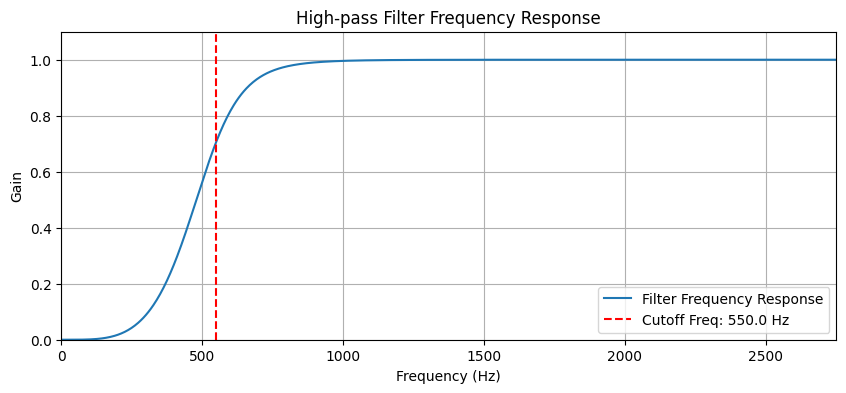

Saved high-pass filtered audio as 'filtered_audio_highpass.wav'.


In [88]:
plt.figure(figsize=(10, 4))
plt.plot(w, np.abs(h), label="Filter Frequency Response")
plt.axvline(cutoff_frequency, color='r', linestyle='--', label=f"Cutoff Freq: {cutoff_frequency} Hz")
plt.title('High-pass Filter Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend()
plt.xlim(0, max(200, cutoff_frequency * 5)) # Zoom in on relevant frequency range
plt.ylim(0, 1.1)
plt.show()


# You can now save 'filtered_audio_np' to a WAV file if needed,
# using the same normalization and scaling method as before.
# Example:
# max_val_filtered = np.max(np.abs(filtered_audio_np))
# if max_val_filtered > 0:
#     normalized_filtered_audio = filtered_audio_np / max_val_filtered
# else:
#     normalized_filtered_audio = filtered_audio_np
# filtered_audio_int16 = np.int16(normalized_filtered_audio * 32767)
# wavfile.write('filtered_audio_highpass.wav', sr, filtered_audio_int16)
# print("Saved high-pass filtered audio.")


filtered_audio_int16 = np.int16(filtered_audio_np / np.max(np.abs(filtered_audio_np)) * 32767)
sp.io.wavfile.write('filtered_audio_highpass.wav', sr, filtered_audio_int16)
print("Saved high-pass filtered audio as 'filtered_audio_highpass.wav'.")

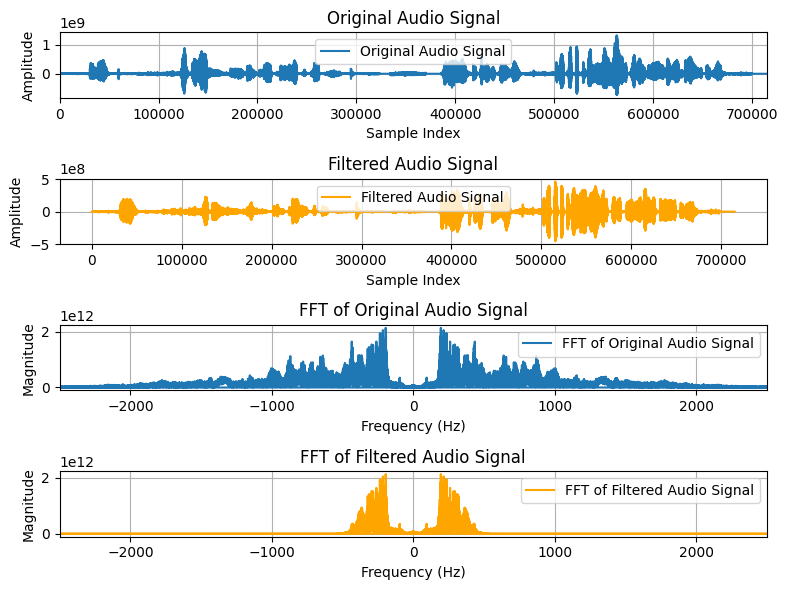

In [105]:
sr , audio = sp.io.wavfile.read('/home/rafael19/Math_code/jadna.wav')
audio_np2 = np.array(audio) 

cutoff_f = 400  # Hz
filter_order = 8  # Filter order (e.g., 4th order Butterworth)

b , a = sp.signal.butter(filter_order , cutoff_f, btype='lowpass', fs=sr, analog=False)

filtered = sp.signal.filtfilt(b, a, audio_np2)

audio_fft = jnp.fft.fft(audio_np2)
audio_f = jnp.fft.fftfreq(len(audio_np2), d=1/sr)

audio_rec_fft = jnp.fft.fft(filtered)
audio_f_rec = jnp.fft.fftfreq(len(filtered), d=1/sr)


fig, ax = plt.subplots(4, 1, figsize=(8, 6))
ax[0].plot(audio_np2, label='Original Audio Signal')
ax[0].set_title('Original Audio Signal')
ax[0].set_xlabel('Sample Index')
ax[0].set_xlim(0, len(audio_np2))
ax[0].set_ylabel('Amplitude')


ax[1].plot(filtered, label='Filtered Audio Signal', color='orange')
ax[1].set_title('Filtered Audio Signal')
ax[1].set_xlabel('Sample Index')
ax[1].set_ylabel('Amplitude')


ax[2].plot(audio_f, jnp.abs(audio_fft), label='FFT of Original Audio Signal')
ax[2].set_title('FFT of Original Audio Signal')
ax[2].set_xlim(-2500, 2500)
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('Magnitude')


ax[3].plot(audio_f_rec, jnp.abs(audio_rec_fft), label='FFT of Filtered Audio Signal', color='orange')   
ax[3].set_title('FFT of Filtered Audio Signal')
ax[3].set_xlim(-2500, 2500)
ax[3].set_xlabel('Frequency (Hz)')
ax[3].set_ylabel('Magnitude')
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()

ax[0].grid(True)
ax[1].grid(True)
ax[2].grid(True)
ax[3].grid(True)
plt.tight_layout()
plt.show()

In [106]:
lowpass_filtered_audio_int16 = np.int16(filtered / np.max(np.abs(filtered)) * 32767)
sp.io.wavfile.write('filtered_audio_lowpass.wav', sr, lowpass_filtered_audio_int16)

In [ ]:
### Applying a bandpass filter